<font color = green >

# Neural networks

</font>

<font color = green >

## HOME TASK
</font>

<font color = green>

##  CAT VS NONCAT DATA SET
    (variant 1)

</font>



In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
%matplotlib notebook

In [7]:
from scipy.stats import logistic

In [8]:
import h5py # common package to interact with a dataset that is stored on an H5 file.


In [9]:
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 

In [10]:
def load_dataset():
    file_name=  os.path.join(path , 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    file_name=  os.path.join(path , 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']
    
    Y_train = Y_train.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test, classes

In [11]:
X_train,Y_train, X_test, Y_test, classes = load_dataset()

<IPython.core.display.Javascript object>


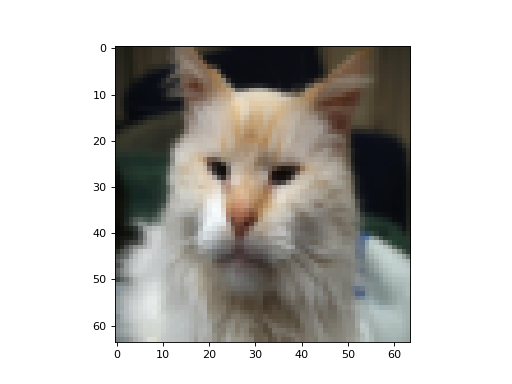

y = [1], it's a 'cat' picture.


In [12]:
index = 27
plt.figure()
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

In [13]:
m_train, num_px,_,_ = X_train.shape
m_test =  X_test.shape[0]
X_train_flatten = X_train.reshape(m_train, -1)
X_test_flatten =  X_test.reshape(m_test, -1)


In [14]:
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

In [15]:
from sklearn.neural_network import MLPClassifier

In [15]:
Y_train = np.squeeze(Y_train)
Y_test = np.squeeze(Y_test)
print ('Y_train.shape=', Y_train.shape)
print ('Y_test.shape=', Y_test.shape)
print ('X_train_scaled.shape=', X_train_scaled.shape)

Y_train.shape= (209,)
Y_test.shape= (50,)
X_train_scaled.shape= (209, 12288)


<font color = green>

###  Shallow Neural Network  (1 Layer)

</font>



In [18]:
# solver= 'lbfgs', 
# random_state=20,
# hidden_layer_sizes=(100)
    
# Your code for 1-layer NN classifyer

print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, Y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, Y_test)))


train accuracy= 100.000%
test accuracy= 74.000%


<font color = green>

###  Shallow MLP Neural Network  (2 Layers)

</font>



In [18]:
# solver= 'lbfgs',
# random_state=20,
# hidden_layer_sizes=(3,3),
# alpha=20, 
# max_iter=1000,
    
# Your code for 2-layers MLP classifyer

print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, Y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, Y_test)))


train accuracy= 100.000%
test accuracy= 74.000%


<font color = green>

###  3 Layers Neural Network 

</font>

Note:  This data set is too small for large nn : even 3 layers nn with 3 neurons in each layer causes overfitting 



In [19]:
#  solver= 'lbfgs'

# Your code for 3-layers MLP classifyer

print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, Y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, Y_test)))


train accuracy= 96.651%
test accuracy= 76.000%


In [53]:
#  cannot reproduce: 
# random_state=20,
# hidden_layer_sizes=(20,7,10),
# max_iter=30,
# train accuracy= 88.038%
# test accuracy= 80.000%

### Compare with SVM 

In [114]:
from sklearn.svm import SVC

In [115]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 99.907%
test accuracy= 95.833%


<font color = green>

##  HANDWRITTEN TEXT
    (variant 2)

</font>



<font color = green>

###  Load the data 

</font>



In [85]:
from scipy.io import loadmat
fn=  os.path.join(path , 'digits.mat')
mat= loadmat(fn)
X = mat['X']
y = mat['y'].ravel()
y = y%10 # make 10 to 0 
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)


X_train.shape= (3750, 400)
X_test.shape= (1250, 400)
y_train.shape= (3750,)
y_test.shape= (1250,)


<font color = green>

###  Visualize the data

</font>



In [86]:
def draw_pixels_img(x, ax = None, title=None):
    '''
    :param x: ndarray - row
    '''

    img_width = int(np.sqrt(x.shape[0]))
    img_height = x.shape[0]/img_width
    try:
        data = x.reshape(img_width, -1).T
    except:
        SystemExit('Cannot compute the size of the picture')
    if ax:
        plt.sca(ax)
    else:
        plt.figure(figsize=(2, 2))
    plt.imshow(data, cmap='Greys', interpolation='nearest')
    plt.axis('off')
    if not title is None:
        plt.title(title)

<font color = green>

###  YOUR CODE FOR 1,2 and 3-LAYERS MLP CLASSIFYER
</font>



In [91]:
#     solver= 'lbfgs',
#     hidden_layer_sizes= (100,100),

# YOUR CODE FOR 1,2 and 3-LAYERS MLP CLASSIFYER with the same as CAT VS NON CAT parameters 

print("train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))

train accuracy= 93.760%
test accuracy= 91.280%


<font color = green>

###  Visualize
</font>



<IPython.core.display.Javascript object>


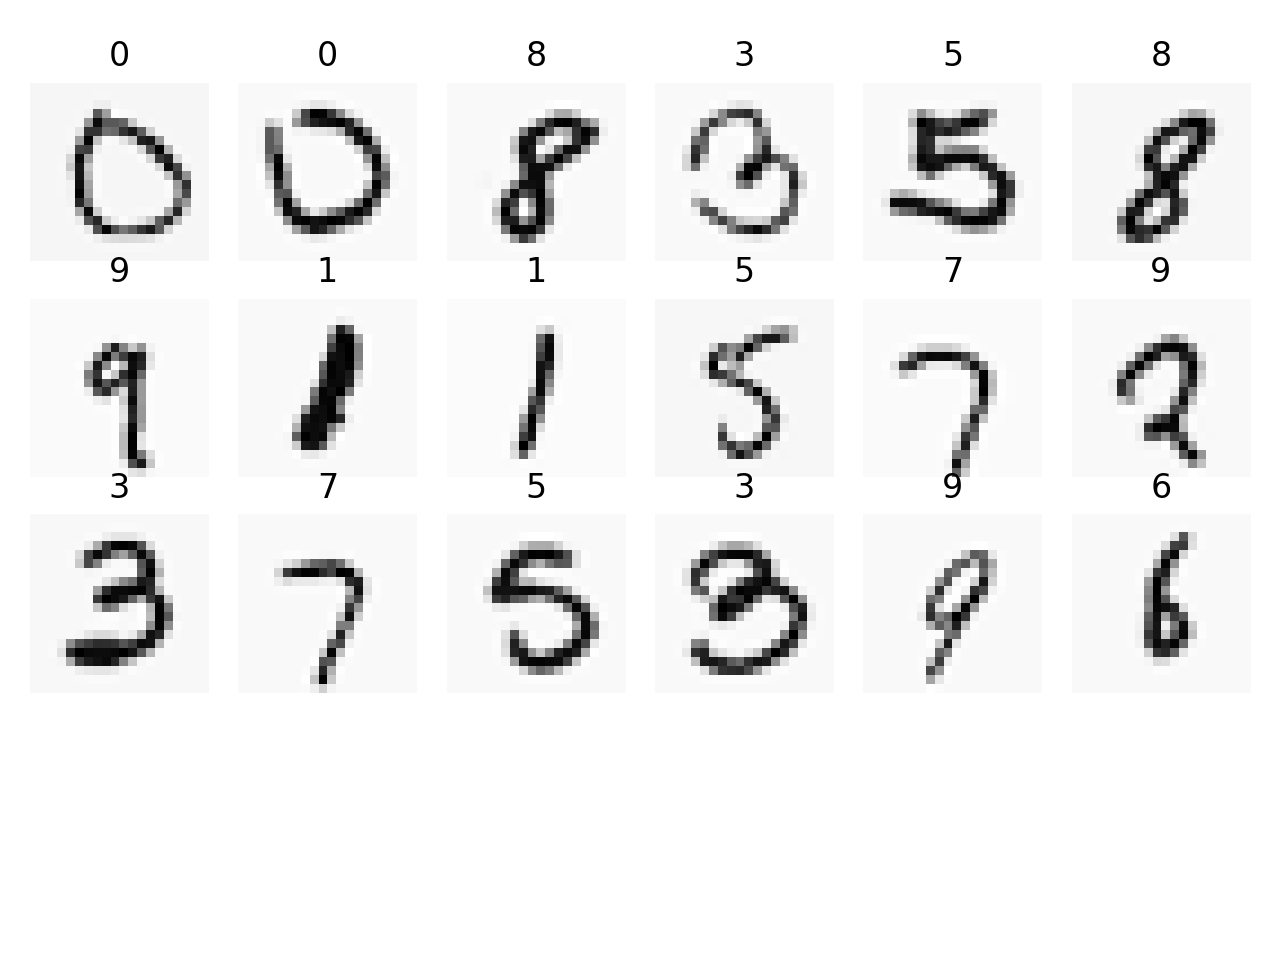

/Users/otsebriy/opt/anaconda3/envs/ot_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


In [93]:
def draw_digits_samples(X,n_rows= 10, n_cols = 10, y=None):
    indices = np.random.randint(0, len(X), n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            if y is None: 
                draw_pixels_img(X[indices[index]], ax)
            else:
                draw_pixels_img(X[indices[index]], ax, title=y[indices[index]])
    plt.tight_layout(h_pad=-1) 

plt.figure()
# draw_digits_samples(X_train,X_train_scaled, n_rows= 4, n_cols = 6, clf = clf)
predicted= clf.predict(X_test_scaled)
draw_digits_samples(X_test, n_rows= 4, n_cols = 6, y = predicted)



### Compare with SVM 

In [114]:
from sklearn.svm import SVC

In [115]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 99.907%
test accuracy= 95.833%


<font color = green>

##  SIGNS DATASET
    (variant 3)

</font>



In [94]:
# signs data set (fingers)
def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes


In [95]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


In [101]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)


<IPython.core.display.Javascript object>


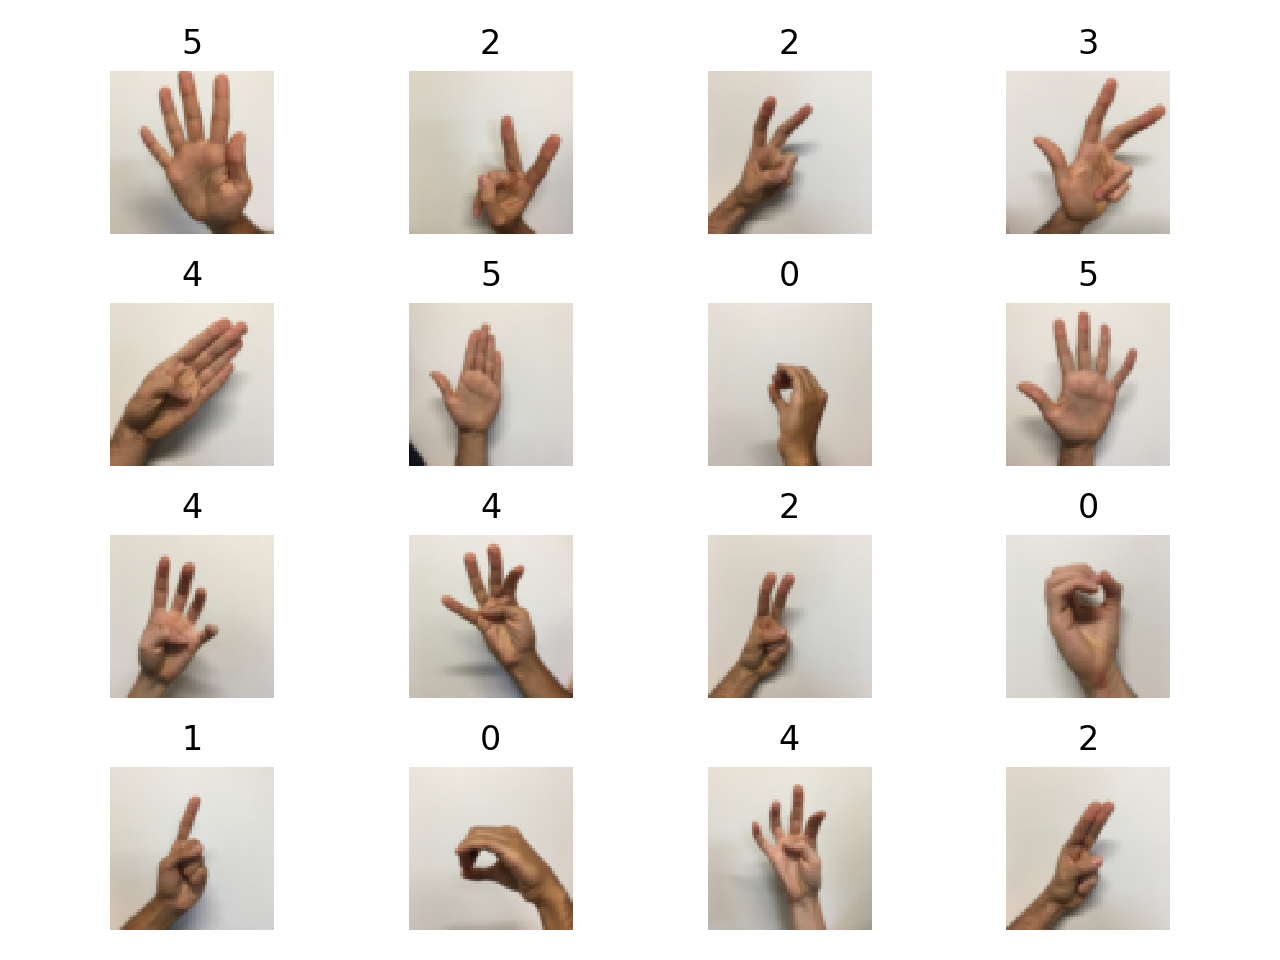

In [102]:
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [103]:
plt.gcf().canvas.set_window_title('Train set')

In [104]:
# Not in use 
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

<font color = green>

###  YOUR CODE FOR 1,2 and 3-LAYERS MLP CLASSIFYER
</font>



In [105]:
# YOUR_CODE.  Preproces data
# START_CODE 
# END_CODE     

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))

print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


### Expected result 

```
number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)
```

In [121]:
# YOUR_CODE.  Train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
clf= None
print("train accuracy= {:.3%}".format(0))
print("test accuracy= {:.3%}".format(0))
# END_CODE     

train accuracy= 100.000%
test accuracy= 90.000%


### Expected result 

```
train accuracy= 100.000%
test accuracy= 90.000%
```

<IPython.core.display.Javascript object>


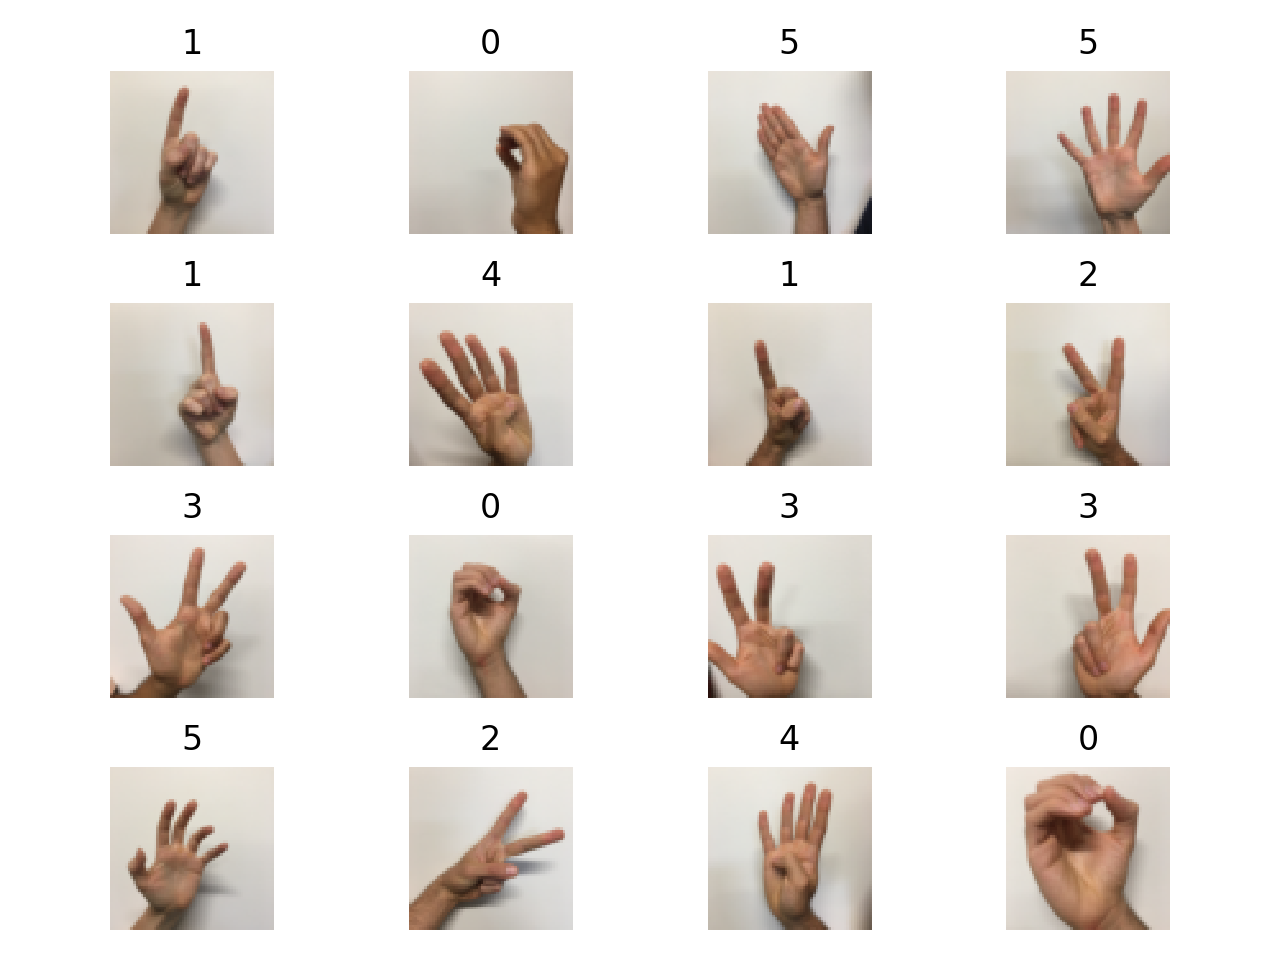

In [122]:
plt.figure()

predicted = clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)


In [113]:
plt.gcf().canvas.set_window_title('Test set prediction')

### Compare with SVM 

In [114]:
from sklearn.svm import SVC

In [115]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 99.907%
test accuracy= 95.833%
